In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [4]:
from itertools import combinations
df = pd.read_csv('results/resilience_normal.csv')
df = df.set_index('Network')
df = df.drop('Overall',axis=1) 
columns = df.columns
scaler = MinMaxScaler()
for col in columns:
    df[col] = scaler.fit_transform(df[[col]])

graph_combinations = [comb for comb in combinations(columns, 2)]



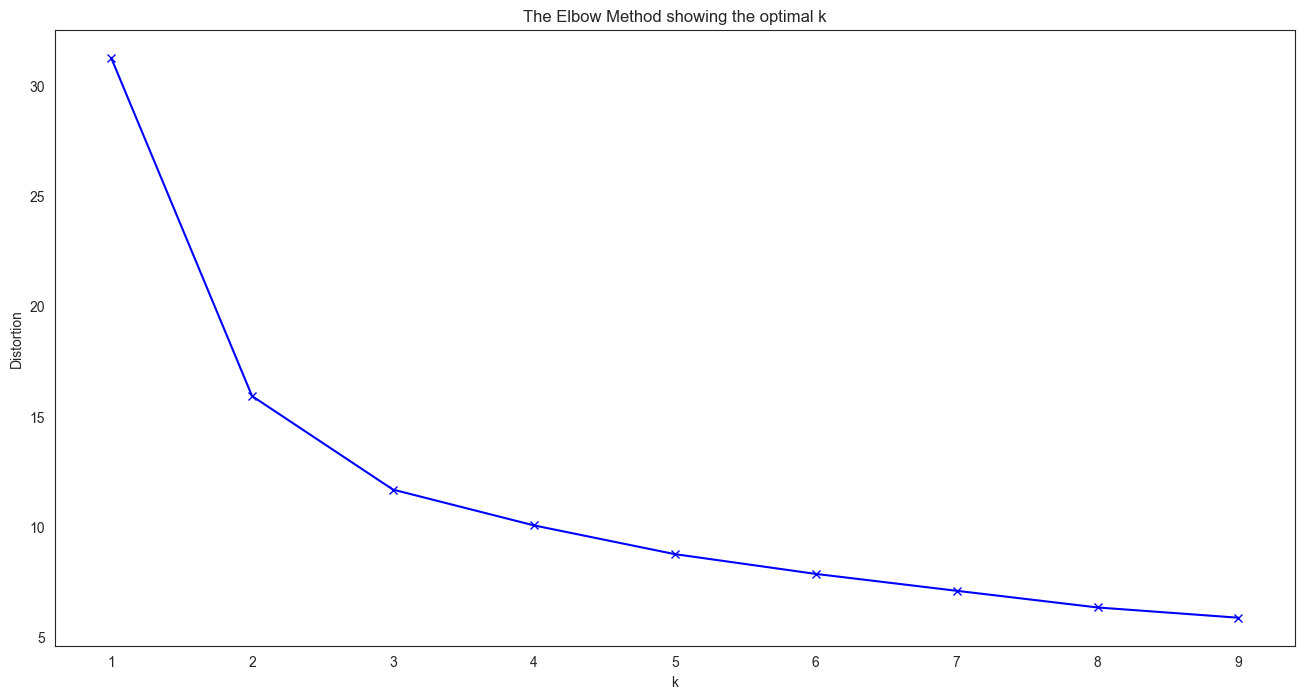

In [5]:
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[columns])
    distortions.append(kmeanModel.inertia_)
    

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[columns])
df['cluster'] = y_predict

In [28]:
groups = df.groupby('cluster').mean().sum(axis=1)
for cluster, performance in zip(groups.sort_values().iteritems(), ['Low-performance', 'Mid-performance', 'High-performance']):
    df.loc[df['cluster'] == cluster[0], 'cluster'] = performance


print(df.head())

                    S        Sp         N        Np          cluster
Network                                                             
variant_100  0.755866  0.317418  0.433360  0.265179  Mid-performance
variant_101  0.710036  0.217305  0.679473  0.366937  Mid-performance
variant_102  0.661038  0.304952  0.462709  0.226857  Mid-performance
variant_103  0.765777  0.222596  0.340097  0.163753  Low-performance
variant_104  0.604322  0.133259  0.193510  0.081985  Low-performance


C:\Users\elir\AppData\Local\Temp\ipykernel_14804\876040342.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cluster, performance in zip(groups.sort_values().iteritems(), ['Low-performance', 'Mid-performance', 'High-performance']):


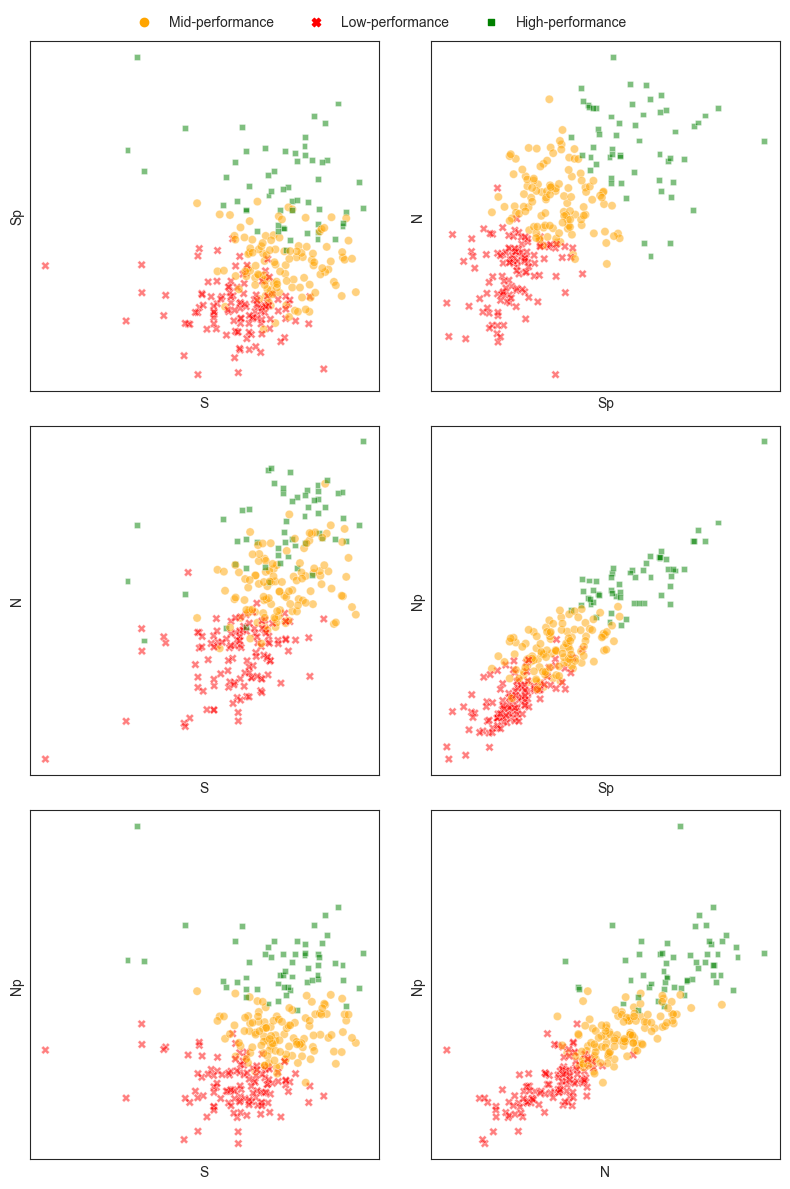

In [43]:
sns.set_style("whitegrid")
palette = {'Low-performance': 'Red', 'Mid-performance': 'Orange', 'High-performance': 'Green'}




plt.rcParams['figure.figsize'] = [8, 12]
sns.set_style("white")
sns.set_palette("bright")
#palette = sns.color_palette("Spectral", as_cmap=True)
fig, axs = plt.subplots(3, 2)
i = 0
for x, ax_x in enumerate(axs[0, :]):
    for y, ax_y in enumerate(axs[:, 0]):
        if x == 0 and y == 0:
            sns.scatterplot(ax= axs[x, y], x=df[graph_combinations[i][0]], y= df[graph_combinations[i][1]], hue=df['cluster'], style=df['cluster'], palette =palette, alpha=0.5)
            sns.move_legend(axs[x, y], "lower center", bbox_to_anchor=(1, 1), ncol=4, title=None, frameon=False)
        else:
            sns.scatterplot(ax= axs[y, x], x=df[graph_combinations[i][0]], y= df[graph_combinations[i][1]], hue=df['cluster'], style=df['cluster'], palette =palette, alpha=0.5, legend = False)
        axs[y, x].set_xticks([])
        axs[y, x].set_yticks([])

        i += 1

        
plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.1)
#plt.savefig('scatter.png', bbox_inches='tight')
plt.show()



In [30]:
attributes_data = pd.read_csv('results/attributes_normal.csv')
attributes_data = attributes_data.set_index('Network')

attributes_data['cluster'] = df['cluster']

print(attributes_data)

                    d         a        cc        Cd        Gd        Gr  \
Network                                                                   
variant_100  0.263158  0.100428  0.450667  0.033675  0.657851  0.642127   
variant_101  0.368421  0.255050  0.673282  0.288121  0.609046  0.621711   
variant_102  0.378947  0.143039  0.555931  0.043958  0.573825  0.560109   
variant_103  0.147368  0.122558  0.220513  0.019694  0.719504  0.732025   
variant_104  0.352632  0.144922  0.643360  0.030437  0.676438  0.687657   
...               ...       ...       ...       ...       ...       ...   
variant_96   1.000000  0.942559  0.831046  0.104595  0.000000  0.000000   
variant_97   0.400000  0.219926  0.648309  0.175021  0.283755  0.276973   
variant_98   0.226316  0.179293  0.265157  0.081336  0.420903  0.439618   
variant_99   0.178947  0.175102  0.237651  0.023629  0.784070  0.765329   
variant_9    0.078947  0.038514  0.118970  0.568310  0.808652  0.789324   

                   Bd   

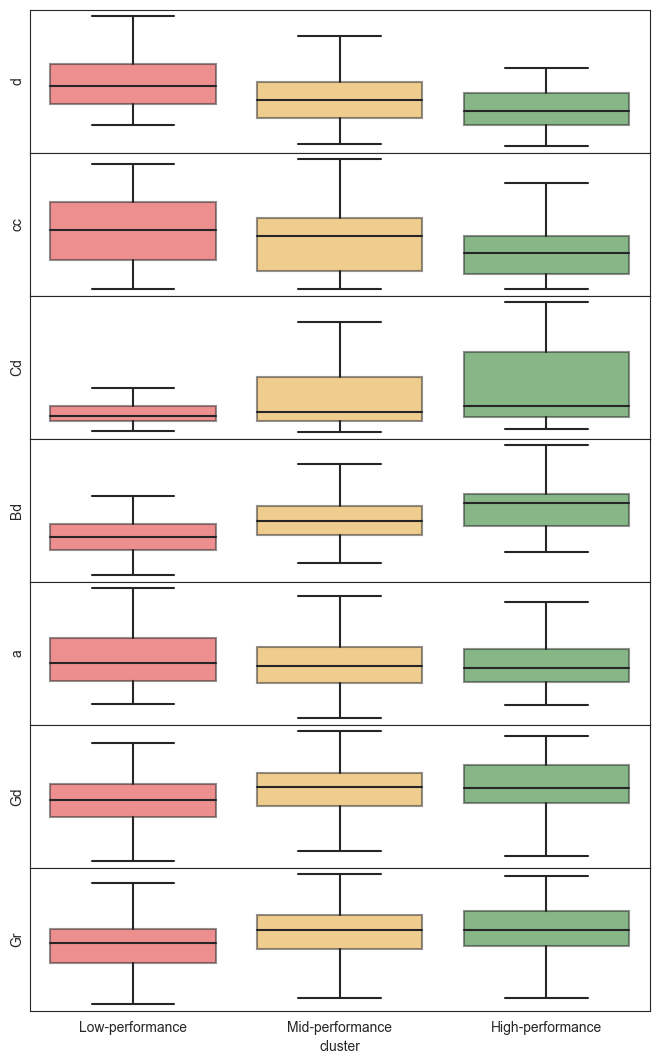

In [46]:
plt.rcParams['figure.figsize'] = [8, 13]
sns.set_style("white")
sns.set_palette("bright")

columns = ['Link density', 'Clustering Coefficient', 'Central Point of Dominance', 'Bridge density']
columns = ['d', 'cc', 'Cd', 'Bd', 'a', 'Gd', 'Gr']

palette = {'Low-performance': 'Red', 'Mid-performance': 'Orange', 'High-performance': 'Green'}
#attributes_data.sort_values('Sort', inplace=True, ascending=True)

fig, axs = plt.subplots(len(columns), 1)
for x, ax_x in enumerate(axs[:]):
    #sns.boxplot(data=attributes_data, x='Sort', y=columns[x], ax=axs[x], palette='Greys', showfliers = False)
    sns.boxplot(data=attributes_data, x='cluster', y=columns[x], ax=axs[x], boxprops=dict(alpha=.5), palette=palette, showfliers = False, order=['Low-performance', 'Mid-performance', 'High-performance'])
    axs[x].set_yticks([])
    #axs[x].set_xticks(['Low performance', 'Medium performance', 'High performance'])
    

plt.subplots_adjust(wspace=1, hspace=0)
#plt.savefig('box_group.png', bbox_inches='tight')
plt.show()

In [25]:
att = 'Bd'
print(attributes_data.loc[attributes_data['cluster'] == 'Low performance', att].quantile([0.25,0.5,0.75]))
print(attributes_data.loc[attributes_data['cluster'] == 'Medium performance', att].quantile([0.25,0.5,0.75]))
print(attributes_data.loc[attributes_data['cluster'] == 'High performance', att].quantile([0.25,0.5,0.75]))

0.25    0.197435
0.50    0.292199
0.75    0.393858
Name: Bd, dtype: float64
0.25    0.310530
0.50    0.416854
0.75    0.528777
Name: Bd, dtype: float64
0.25    0.379356
0.50    0.558119
0.75    0.627644
Name: Bd, dtype: float64
